<a href="https://colab.research.google.com/github/aidanmwood/data-analysis/blob/main/Aidan_Wood_pandas_weather_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive

The path to drive is '/content/drive'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Display the contents of the folder where the data exists

Use `!ls` followed by the path to the folder containg the data file.  Be sure to escape `\` any special characters, like spaces, that might be part of a folder name. The path to the folder begins with the path used above and ends with `/*.txt`. This will display all (`*`) files, with extension `.txt` that are in the location provided by the path.

ex: `!ls content/drive/My\ Drive/ColabNBs/*.txt`

Notice the escaped space between "My" and "Drive".  Also when doing this the path is NOT in quotes, the language here is not Python but Command Line and as such does not require the path to be a string.

In [2]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/*.txt

'/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'


# Create a convert_temp function

The temperatures, in the data, are in degrees Celsius and mulitplied by 10 so there are no decimals in the data.  Create a function to convert a given temp to a temp in degrees Fahrenheit, rounded to one decimal place.



In [3]:
def temp_convert(temp):
  convert_decimal = int(temp)/10
  convert_temp = round(1.8 * convert_decimal + 32, 1)
  return convert_temp


# Read the data from the file

Create the path (should be the one use above, with the specific file that you will read from).

Use this path to read the dat from the file.  Decide how you will do this and what format would you like the data returned as.

Spend some time looking at the data and deciding how you will "clean" the data.  

1.   Which columns of data are of interest and wich will be ignored
2.   What are the data types currently and what do you want them to be
3.   What data do you want and how will you store the data you choose
4.   How will you convert the data that needs changing
5.   Is there any missing or unusual data? How will you handle this?
6.   Other?

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'

with open(path) as file:
  data_list = file.readlines()

data_list

# Create a Python dictionary with the weather data

Copy/Paste your code from the previous NB

In [5]:
with open("/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt") as f:
    
    
    
    # throwing out unused lines
    f.readline()
    f.readline()

    weather_dict = {"dates" : [], "tmax" : [], "tmin" : []}

    for entry in f:
      # breaking up line of data by whitespace
      line = entry.split()
      date = line[1]

      # catagorizing date data
      year = date[:4]
      month = date[4:6]
      day = date[6:]

      # formatting the date
      f_date = f"{month}/{day}/{year}"
      
      tmax = temp_convert(line[5])
      
      tmin = temp_convert(line[6])
      
      weather_dict["dates"].append(f_date)
      weather_dict['tmax'].append(tmax)
      weather_dict['tmin'].append(tmin)

# Pandas

## Create a Dataframe using the weather dictionary

In [6]:
# create a pandas df
import pandas as pd

weather_df = pd.DataFrame(data=weather_dict)

weather_df

,dates,tmax,tmin
0,01/01/2013,32.0,10.9
1,01/02/2013,24.1,3.0
2,01/03/2013,23.0,-0.0
3,01/04/2013,34.0,9.0
4,01/05/2013,36.0,16.0
...,...,...,...
360,12/27/2013,32.0,7.2
361,12/28/2013,37.0,18.1
362,12/29/2013,35.1,20.1
363,12/30/2013,35.1,8.2


## Display the first 5 and last 5 rows

In [7]:
print(weather_df.head())
print()
print(weather_df.tail())

        dates  tmax  tmin
0  01/01/2013  32.0  10.9
1  01/02/2013  24.1   3.0
2  01/03/2013  23.0  -0.0
3  01/04/2013  34.0   9.0
4  01/05/2013  36.0  16.0

          dates  tmax  tmin
360  12/27/2013  32.0   7.2
361  12/28/2013  37.0  18.1
362  12/29/2013  35.1  20.1
363  12/30/2013  35.1   8.2
364  12/31/2013  13.1   1.2


## Display a summary of basic information about your df, in two ways

In [8]:
# df.info() and df.describe()

print(weather_df.info())
print()
print(weather_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dates   365 non-null    object 
 1   tmax    365 non-null    float64
 2   tmin    365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB
None

             tmax        tmin
count  365.000000  365.000000
mean    55.941644   38.138904
std     18.882167   17.374042
min      8.100000   -5.800000
25%     39.900000   26.200000
50%     57.000000   37.000000
75%     71.100000   52.000000
max     95.000000   73.000000


## Display the first 3 rows of the max temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [9]:
from pandas.io.formats.style_render import DataFrame as df
# df.iloc[[rowstart:rowstop], [col1]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[rowstart:rowstop], [col1]] for label selection; 
# stop is inclusive

loc = weather_df.loc[0:2, ['tmax']]

iloc = weather_df.iloc[0:3, [1]]

print(loc)
print()
print(iloc)

   tmax
0  32.0
1  24.1
2  23.0

   tmax
0  32.0
1  24.1
2  23.0


## ## Display the rows 10, 100, 200, and 365 of the date and min temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [10]:
# df.iloc[[row1, row2, ...], [col1, col2, ...]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[row1, row2, ...], [col1, col2, ...]] for label selection; 
# stop is inclusive

iloc = weather_df.iloc[[10, 100, 200, 364], [0, 2]]
loc = weather_df.loc[[10, 100, 200, 364], ['dates', 'tmin']]

print(iloc)
print()
print(loc)

          dates  tmin
10   01/11/2013  19.0
100  04/11/2013  39.9
200  07/20/2013  70.0
364  12/31/2013   1.2

          dates  tmin
10   01/11/2013  19.0
100  04/11/2013  39.9
200  07/20/2013  70.0
364  12/31/2013   1.2


## Select only the rows where the max temps are greater than 90. Assign this to a variable

In [11]:
# df.loc[df[col] condition]

max_temps = weather_df.loc[weather_df['tmax'] > 90]

print(max_temps)

          dates  tmax  tmin
150  05/31/2013  91.9  57.9
174  06/24/2013  91.9  66.9
175  06/25/2013  91.0  69.1
185  07/05/2013  93.0  73.0
195  07/15/2013  91.0  70.0
199  07/19/2013  95.0  69.1
200  07/20/2013  91.0  70.0
253  09/11/2013  93.0  61.0


## Using the dataframe (assigned to a variable) from the previous cell, get just the dates where the temperature was greater than 90.  Convert to a Python list.

In [12]:
# df[col]
max_temp_dates = max_temps['dates']

print(max_temp_dates)

150    05/31/2013
174    06/24/2013
175    06/25/2013
185    07/05/2013
195    07/15/2013
199    07/19/2013
200    07/20/2013
253    09/11/2013
Name: dates, dtype: object


## Convert to a Python list

In [13]:
# df.tolist()
tmax_list = max_temp_dates.tolist()

print(tmax_list)

['05/31/2013', '06/24/2013', '06/25/2013', '07/05/2013', '07/15/2013', '07/19/2013', '07/20/2013', '09/11/2013']


# Plot Weather Data

Plot the days of the year where the minimum temperature greater than 40 degrees.

<function matplotlib.pyplot.show(*args, **kw)>

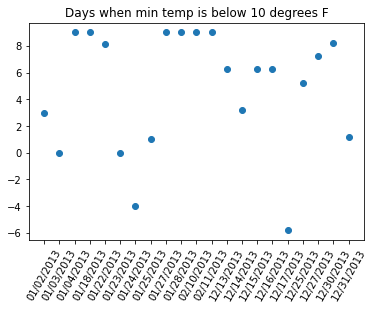

In [14]:
from matplotlib import pyplot as plt

items_below_10 = weather_df.loc[weather_df['tmin'] < 10]

min_temp_dates = items_below_10['dates'].tolist()

tmin_list = items_below_10['tmin'].tolist()

plt.title('Days when min temp is below 10 degrees F')
plt.scatter(min_temp_dates, tmin_list)
plt.xticks(rotation=60)
plt.show